In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#pd.set_option('display.max_rows', None)

In [84]:
df = pd.read_csv('./train.csv')

# EDA

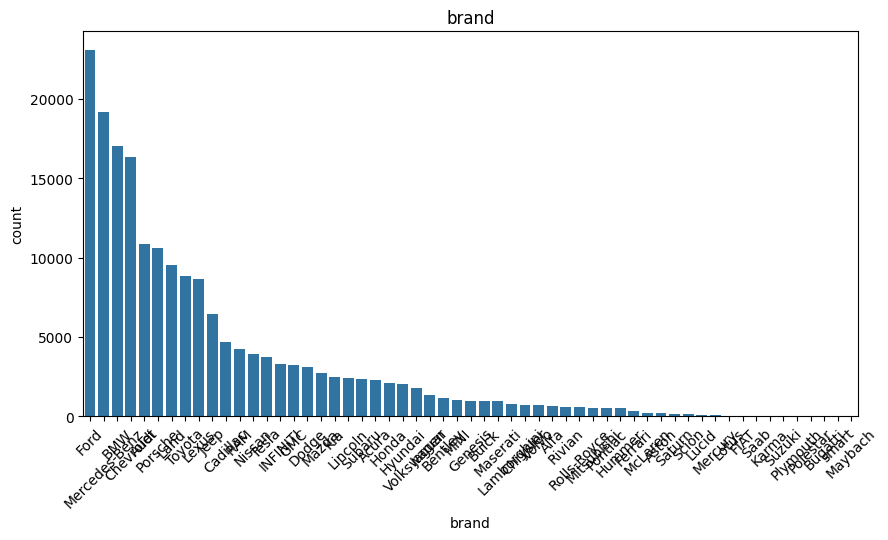

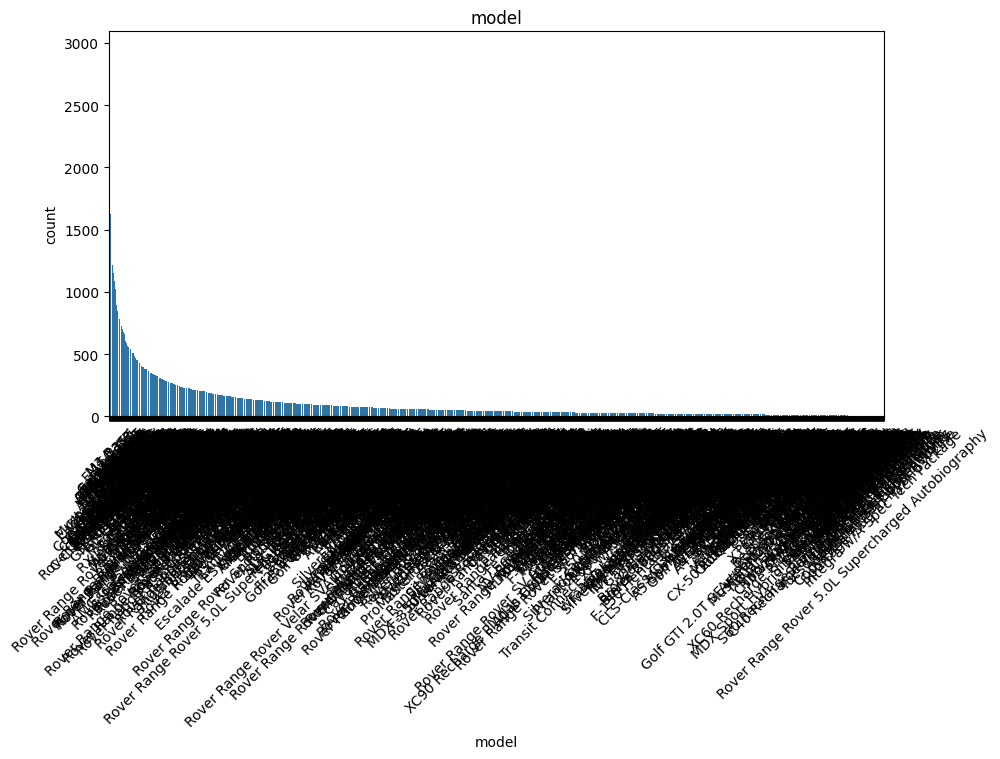

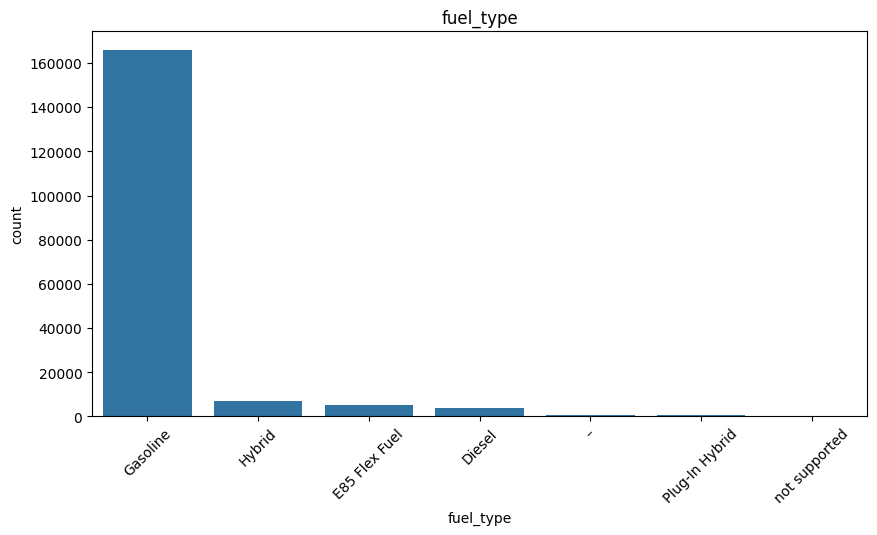

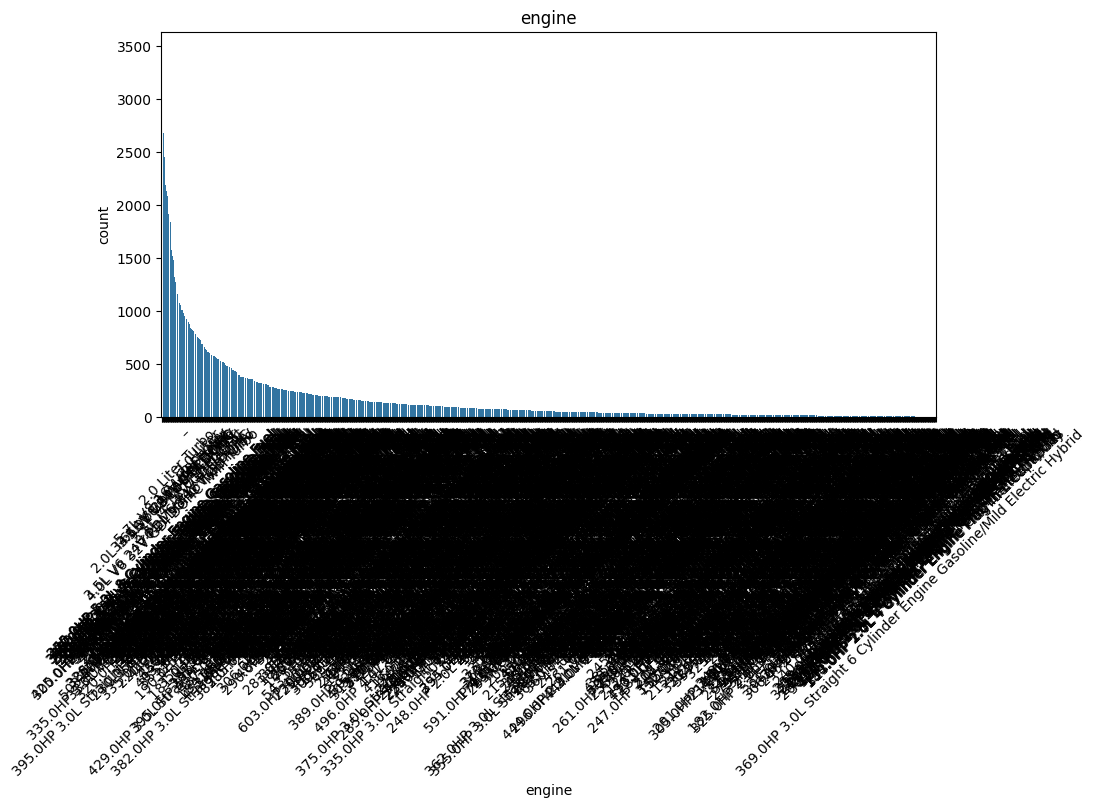

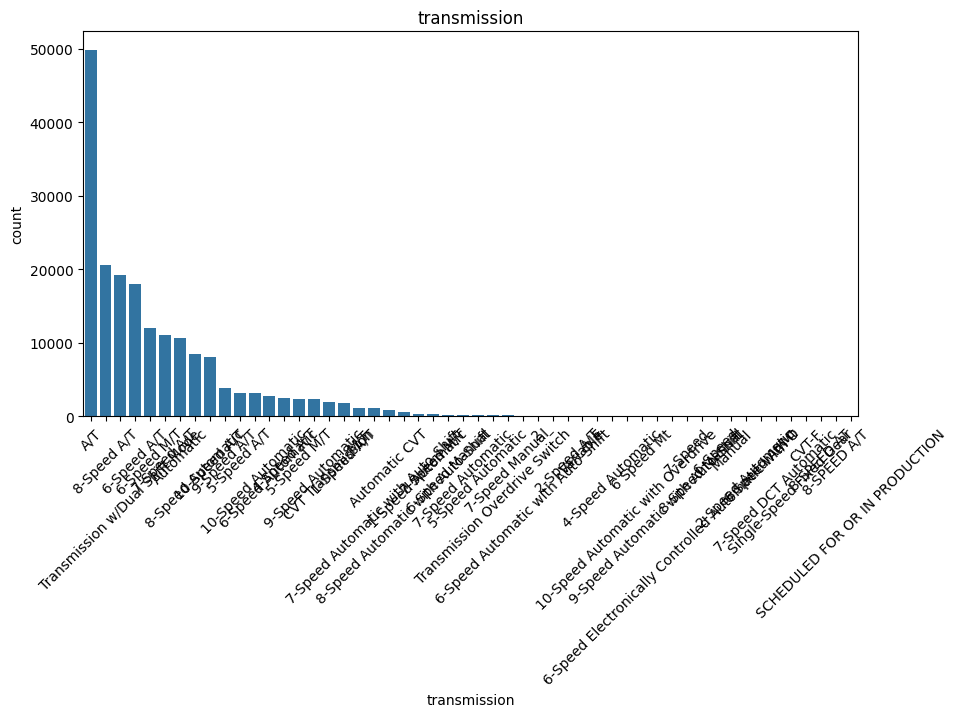

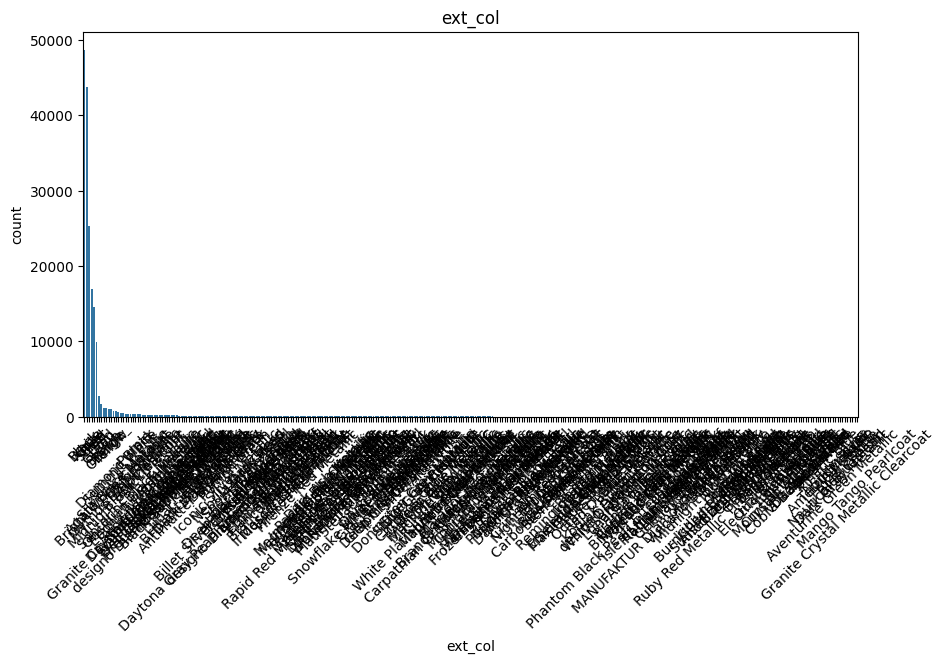

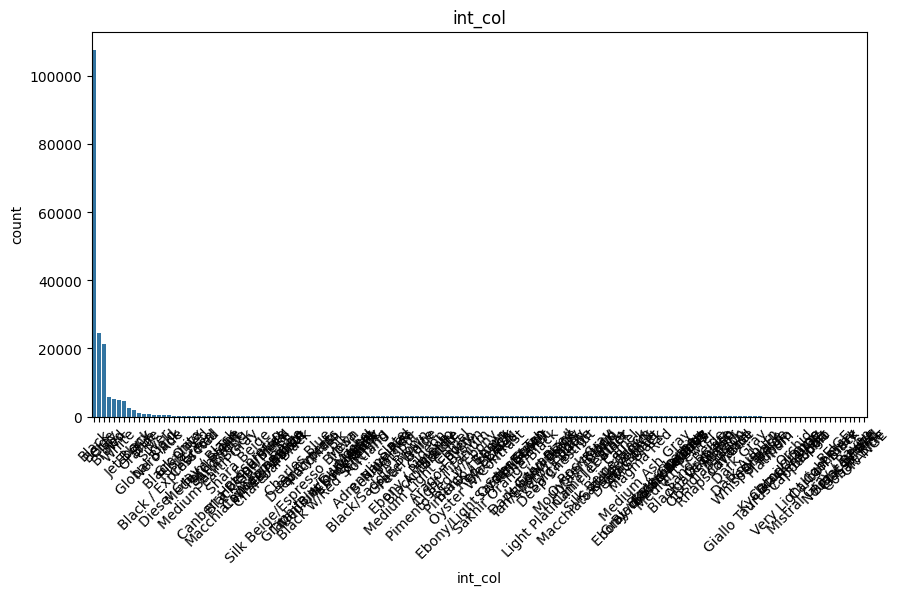

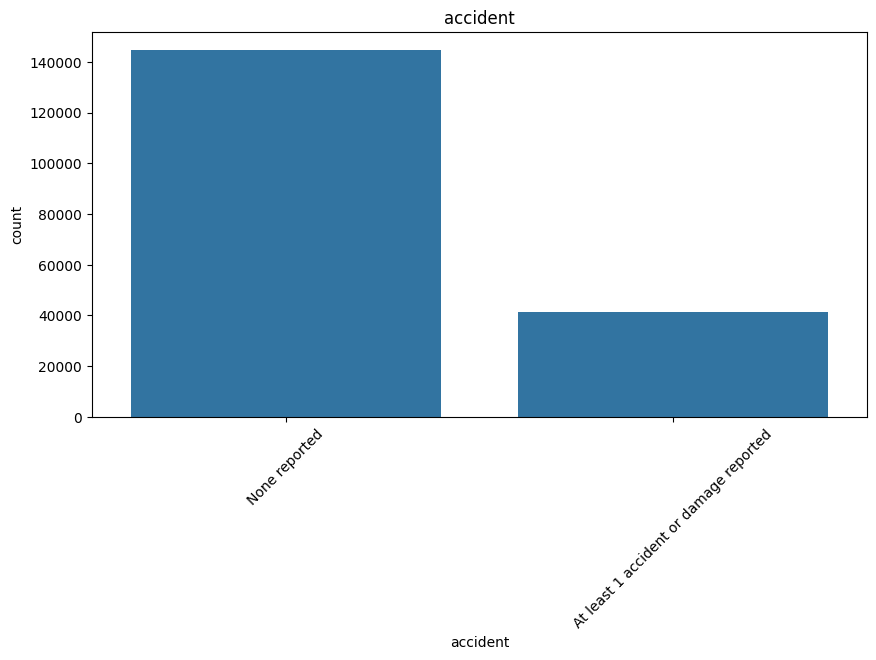

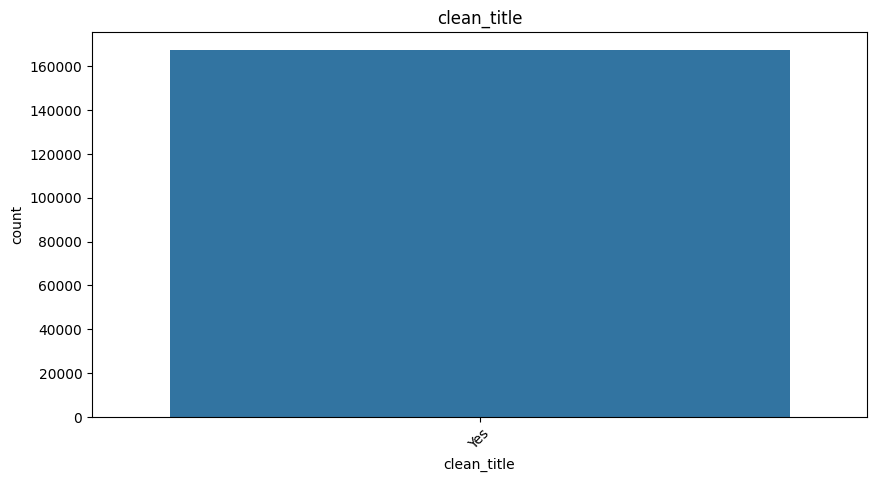

In [73]:
cat_columns = df.select_dtypes(include=['object','category']).columns

for col in cat_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show

In [74]:
df.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [75]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


# Cleaning & Transforming Data

In [76]:
df['accident'] = np.where(df['accident']=='None reported', 0, 1)
df['gasoline'] = np.where(df['fuel_type']=='Gasoline', 1, 0)

In [77]:
# ext_col and int_col
df['int_col'] = df['int_col'].str.replace('/',' ').str.lower().str.split(' ')
df['ext_col'] = df['ext_col'].str.replace('/',' ').str.lower().str.split(' ')

simple_colors = ['black','beige','gray','brown','red','white']
external_color = []
internal_color = []

for sub_list in df['ext_col']:
    found = False
    for color in simple_colors:
        if color in sub_list:
            external_color.append(color)
            found = True
            break
    if not found:
        external_color.append("others")

for sub_list in df['int_col']:
    found = False
    for color in simple_colors:
        if color in sub_list:
            internal_color.append(color)
            found = True
            break
    if not found:
        internal_color.append("others")

df['ext_col'] = external_color
df['int_col'] = internal_color

In [78]:
#df['brand'] = [brand_name if len(df['brand']==brand_name)<1000 else "other" for brand_name in df['brand']]
aux_count = df['brand'].value_counts()
df['brand'] = [brand_name if aux_count[brand_name] >= 1000 else "other" for brand_name in df['brand']]

In [79]:
df['model'].value_counts().head(20) # will be handled inside lgbm and catboost

model
F-150 XLT                      2945
M3 Base                        2229
Camaro 2SS                     1709
M4 Base                        1622
Mustang GT Premium             1526
F-150 Lariat                   1410
E-Class E 350 4MATIC           1357
1500 Laramie                   1249
911 Carrera S                  1219
Corvette Base                  1184
E-Class E 350                  1148
GX 460 Base                    1124
911 Carrera                    1111
Explorer XLT                   1091
Corvette Stingray w/2LT        1081
Rover Range Rover Sport HSE    1027
Wrangler Sport                 1001
AMG G 63 Base                   994
F-250 XLT                       893
QX60 Base                       847
Name: count, dtype: int64

In [82]:
df['transmission'].value_counts().head(20) # will be handled inside lgbm and catboost

transmission
A/T                                  49904
8-Speed A/T                          20645
Transmission w/Dual Shift Mode       19255
6-Speed A/T                          18044
6-Speed M/T                          11998
7-Speed A/T                          11124
Automatic                            10691
8-Speed Automatic                     8431
10-Speed A/T                          8044
9-Speed A/T                           3866
5-Speed A/T                           3217
10-Speed Automatic                    3164
6-Speed Automatic                     2799
4-Speed A/T                           2546
5-Speed M/T                           2409
9-Speed Automatic                     2325
CVT Transmission                      1990
1-Speed A/T                           1869
M/T                                   1179
7-Speed Automatic with Auto-Shift     1172
Name: count, dtype: int64

In [85]:
df['transmission'] = df['transmission'].str.replace('-',' ').str.replace('w/',' ').str.split(' ')

In [88]:
transmission_types = ['M/T','A/T']
transmission_speed = ['1','2','3','4','5','6','7','8','9','10']
transmission_shift = ['Dual', 'Auto-Shift']

aux_type = []
aux_speed = []
aux_shift = []

for i in df['transmission']:
    found = False
    for type in transmission_types:
        if type in i:
            aux_type.append(type)
            found = True
            break
    if not found:
        aux_type.append("A/T")
    found = False
    for speed in transmission_speed:
        if speed in i:
            aux_speed.append(speed)
            found = True
            break
    if not found:
        aux_speed.append("M/T")
    found = False
    for shift in transmission_shift:
        if shift in i:
            aux_shift.append(shift)
            found = True
            break
    if not found:
        aux_shift.append("M/T")

df['transmission_type'] = aux_type
df['transmission_speed'] = aux_speed
df['transmission_shift'] = aux_shift

In [89]:
df.engine.value_counts()
# tratar fuel type também
# tratar dylinder
# tratar volume
# tratar horsepower

engine
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel           3462
240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel           2902
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel           2841
2.0L I4 16V GDI DOHC Turbo                             2680
375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel          2451
                                                       ... 
78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel               1
139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas       1
151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid        1
184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability       1
313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas       1
Name: count, Length: 1117, dtype: int64